# Testing Models for EpiNu GPS grouping or classification

The data being used is from: https://www.kaggle.com/datasets/art12400/gps-points/data

**Context**
This dataset was generated by looking up the address for uniformly sampled GPS points for an area in China around Beijing. It can be used to learn the outlines of three regions, and examine the decision boundaries of various models. One can also experiment with different sampling techniques and unbalanced datasets.

**Content**
The dataset is made up of latitude and longitude pairs. Each point is labelled based on in which of 3 districts 河北省 (Hebei), 北京市 (Beijing), and 天津市 (Tianjin) is it located.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

%matplotlib inline

Assuming there is 3 group of womans, we change the location of 3 districts into a,b, and c.

In [35]:
#Upload Dataframe of gps
gps_train = pd.read_csv('train.csv')
gps_train.rename(columns={'河北省': 'a', '北京市': 'b', '天津市': 'c'}, inplace=True)
gps_train.head()

,lat,lng,a,b,c
0,36.091445,114.974121,1,0,0
1,36.194537,115.435547,1,0,0
2,36.194537,115.343262,1,0,0
3,36.194537,115.066406,1,0,0
4,36.194537,114.974121,1,0,0


**Visualizing the training data**

Understanding the training data by using visualization

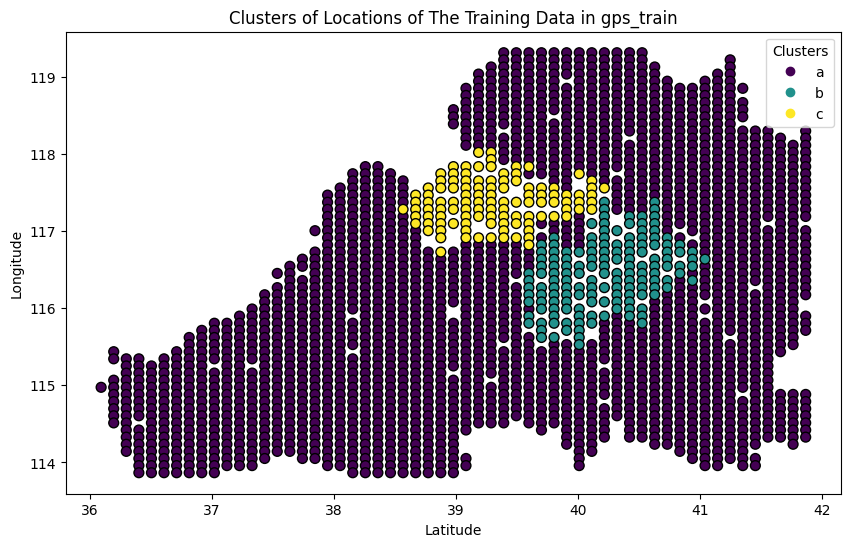

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming gps_train is your DataFrame with 'lat', 'lng', 'a', 'b', 'c'

# Convert one-hot encoded columns to a single 'cluster' column in gps_train
gps_train['cluster'] = gps_train[['a', 'b', 'c']].idxmax(axis=1)

# Convert cluster labels to numerical format for coloring
cluster_labels = gps_train['cluster'].astype('category').cat.codes

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(gps_train['lat'], gps_train['lng'], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clusters of Locations of The Training Data in gps_train')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Create a legend
# Get unique labels and colors from the scatter plot
handles, labels = scatter.legend_elements(prop="colors")
cluster_names = gps_train['cluster'].unique()
plt.legend(handles, cluster_names, title="Clusters")

plt.show()

In [36]:
gps_test = pd.read_csv('test.csv')
gps_test.rename(columns={'河北省': 'a', '北京市': 'b', '天津市': 'c'}, inplace=True)
gps_test.head()

,lat,lng,a,b,c
0,36.400720,114.512695,1,0,0
1,39.390372,118.296387,1,0,0
2,39.390372,115.527832,1,0,0
3,40.833653,117.004395,1,0,0
4,41.039836,115.896973,1,0,0


**Visualizing the test data**

Understanding the test data by using visualization

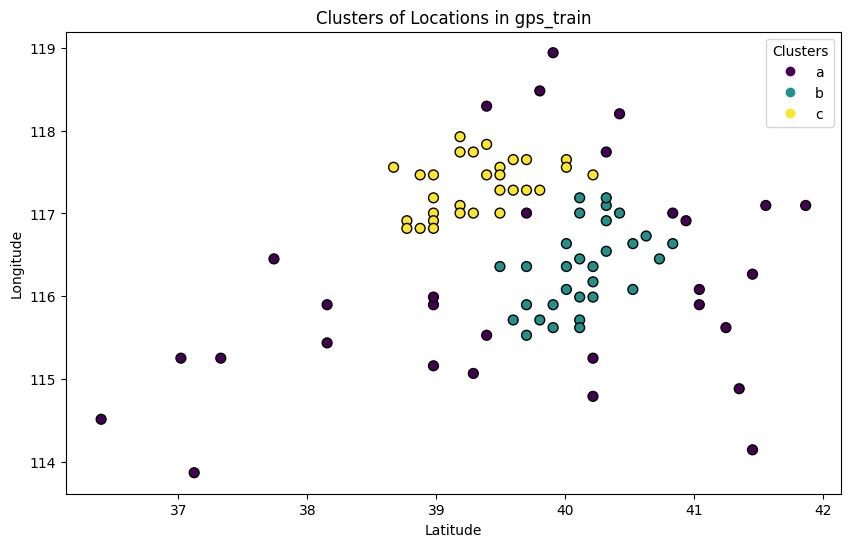

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming gps_train is your DataFrame with 'lat', 'lng', 'a', 'b', 'c'

# Convert one-hot encoded columns to a single 'cluster' column in gps_train
gps_test['cluster'] = gps_test[['a', 'b', 'c']].idxmax(axis=1)

# Convert cluster labels to numerical format for coloring
cluster_labels = gps_test['cluster'].astype('category').cat.codes

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(gps_test['lat'], gps_test['lng'], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Clusters of Locations in gps_train')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Create a legend
# Get unique labels and colors from the scatter plot
handles, labels = scatter.legend_elements(prop="colors")
cluster_names = gps_test['cluster'].unique()
plt.legend(handles, cluster_names, title="Clusters")

plt.show()

**Method 1 - Multiple Classification Logistic Regression Using Training Data using and Using Testing Data as the "Future Data"**

TLDR: Not a good model

In [7]:
# Training the model
x_train = gps_train[['lat','lng']]
y_train = gps_train[['a', 'b', 'c']].idxmax(axis=1)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(x_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [8]:
# Evaluate the model
from sklearn.metrics import accuracy_score

x_test = gps_test[['lat','lng']]
y_test = gps_test[['a', 'b', 'c']].idxmax(axis=1)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3333333333333333


Using multiclass logistic regression shows a really bad accuracy, lower than 0.333. This is the same as guessing. This shows that multiclass logistic regression isn't a good model for grouping woman.

**Method 2 - Using K-Means Clustering with the Training Data to Group Each Points**

Using K-Means Clustering will make the algorithm determine which location is part of the group. Asuming that everyone lives in a group, on this section I don't use the actual location from the dataset as a sanity check to the accuracy. Just to see how it group.

TLDR: Not a good model with this data where within a certain radius, there is 3 different grouping. Good if we have group of woman leaving close to each other but not mixed like this dataset.

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:
# Assuming gps_train is your DataFrame and it has 'lat' and 'lng' columns

# Select features for clustering
X = gps_train[['lat', 'lng']]

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels
gps_train['cluster'] = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


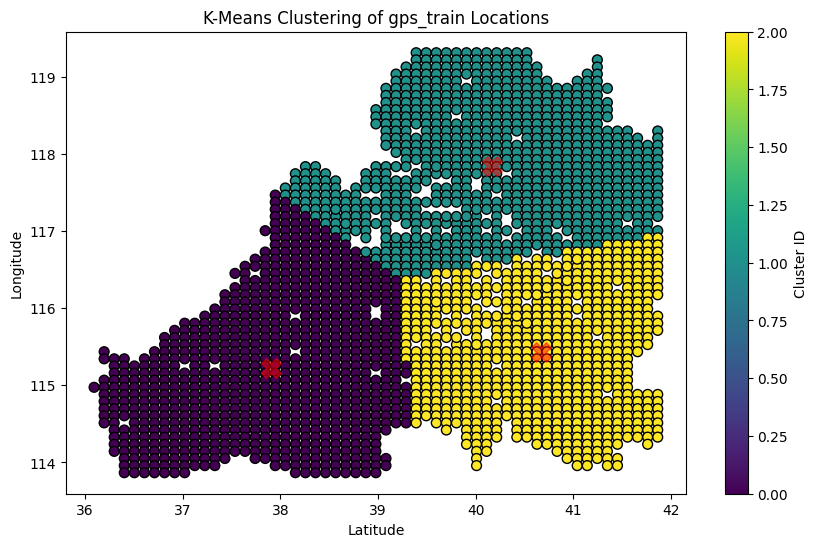

In [14]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(gps_train['lat'], gps_train['lng'], c=gps_train['cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-Means Clustering of gps_train Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster ID')

# Optionally, plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')

plt.show()

This shows that the K-Means clustering is only good if we categorize the group of women based on a diameter of location or radius.

**Method 3 - Random Forrest to Train the model using Training Data and Testing it with the Test Data**

TLDR: A good way to do clustering with any dataset. This may just be the best way for EpiNu on making grouping. We can use the pretrain data if we already have it.

In [27]:
# Convert one-hot encoded columns 'a', 'b', 'c' to a single column 'target'
gps_train['target'] = gps_train[['a', 'b', 'c']].idxmax(axis=1)

# Alternatively, if you want numerical labels for the target
gps_train['target'] = gps_train[['a', 'b', 'c']].values.argmax(axis=1)

display(gps_train)

,lat,lng,a,b,c,cluster,target
0,36.091445,114.974121,1,0,0,0,0
1,36.194537,115.435547,1,0,0,0,0
2,36.194537,115.343262,1,0,0,0,0
3,36.194537,115.066406,1,0,0,0,0
4,36.194537,114.974121,1,0,0,0,0
...,...,...,...,...,...,...,...
2166,40.112013,117.558105,0,0,1,1,2
2167,40.112013,117.465820,0,0,1,1,2
2168,40.112013,117.373535,0,0,1,1,2
2169,40.112013,117.281250,0,0,1,1,2


In [18]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = gps_train[['lat', 'lng']]
y = gps_train['target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Convert one-hot encoded columns 'a', 'b', 'c' to a single column 'target'
gps_test['target'] = gps_test[['a', 'b', 'c']].idxmax(axis=1)

# Alternatively, if you want numerical labels for the target
gps_test['target'] = gps_test[['a', 'b', 'c']].values.argmax(axis=1)

display(gps_test)

,lat,lng,a,b,c,target
0,36.400720,114.512695,1,0,0,0
1,39.390372,118.296387,1,0,0,0
2,39.390372,115.527832,1,0,0,0
3,40.833653,117.004395,1,0,0,0
4,41.039836,115.896973,1,0,0,0
...,...,...,...,...,...,...
85,38.771823,116.819824,0,0,1,2
86,39.287281,117.004395,0,0,1,2
87,40.008921,117.558105,0,0,1,2
88,39.390372,117.465820,0,0,1,2


In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Prepare the test features
X_test = gps_test[['lat', 'lng']]

# Predictions on the test set
y_pred = rf.predict(X_test)

# Actual target values
y_test = gps_test['target']

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed performance report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        30
           1       1.00      0.93      0.97        30
           2       1.00      0.90      0.95        30

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.95        90
weighted avg       0.95      0.94      0.95        90



<ipython-input-30-257ead23da25>:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(gps_test['lat'], gps_test['lng'], c=gps_test['predicted_target'], cmap='viridis', alpha=0.5, edgecolor='k', marker='x', label='Predicted Class')


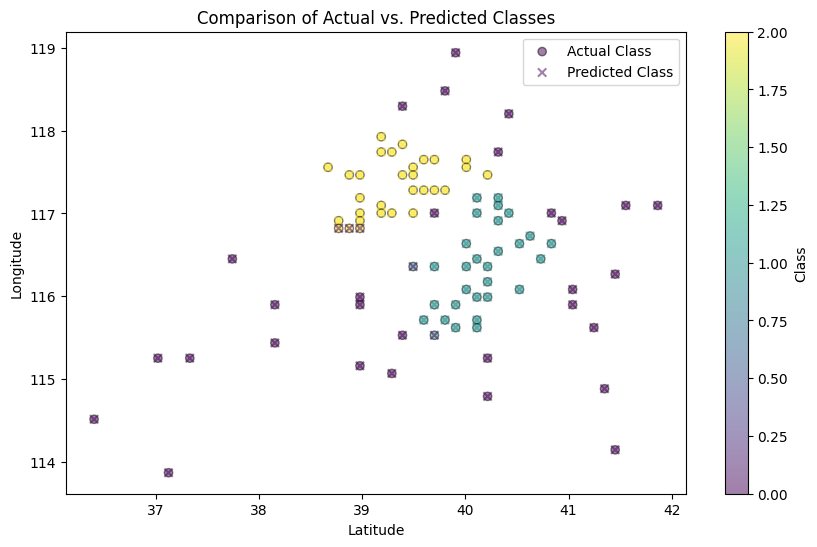

In [30]:
import matplotlib.pyplot as plt

# Assuming y_pred contains the predicted classes for gps_test
gps_test['predicted_target'] = y_pred  # Add predictions to the dataframe for plotting

plt.figure(figsize=(10, 6))

# Scatter plot of actual targets
plt.scatter(gps_test['lat'], gps_test['lng'], c=gps_test['target'], cmap='viridis', alpha=0.5, edgecolor='k', label='Actual Class')
# Scatter plot of predicted targets
plt.scatter(gps_test['lat'], gps_test['lng'], c=gps_test['predicted_target'], cmap='viridis', alpha=0.5, edgecolor='k', marker='x', label='Predicted Class')

plt.title('Comparison of Actual vs. Predicted Classes')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.colorbar(label='Class')

plt.show()


The accuracy that the random forrest give is great (0.944) which by the above visualization is much better than the other model. However, this model is only great if we already have a data of location of each group of woman.

**Conclusion**

1. Logistic Regression: Not a good model
2. Means Clustering: A really good model if each woman lives within a radius and we don't have pretrained data to teach the model location of groups of woman.
3. Random Forrest: A really good model if we already have data of each woman and group location GPS.
